In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
log_file = "/workspaces/Minerva-Discovery/my_experiments/sam_original/exec_experiment_2/results/experiment-parihaka_experiment_20250107_212209/experiment_log.csv"
df = pd.read_csv(log_file)
df.head()

,ratio,experiment_num,facie,val_loss_epoch,train_loss_epoch,test_loss_epoch,val_mIoU,train_mIoU,test_mIoU
0,0.01,0,0,tensor(0.0279),tensor(0.0022),0.032703,tensor(0.9775),tensor(0.9953),0.973815
1,0.01,0,1,tensor(0.5619),tensor(0.0250),0.961861,tensor(0.7924),tensor(0.9783),0.701850
2,0.01,0,2,tensor(0.0547),tensor(0.0042),0.068913,tensor(0.8696),tensor(0.9694),0.784441
3,0.01,0,3,tensor(0.2881),tensor(0.0053),0.540100,tensor(0.8554),tensor(0.9950),0.788502
4,0.01,0,4,tensor(0.0390),tensor(0.0023),0.023775,tensor(0.6557),tensor(0.9660),0.546408


In [3]:
# Convertendo colunas tensor para float
df['ratio'] = pd.to_numeric(df['ratio'], errors='coerce')
df['val_loss_epoch'] = df['val_loss_epoch'].apply(lambda x: float(str(x).strip('tensor()')) if isinstance(x, str) else x)
df['train_loss_epoch'] = df['train_loss_epoch'].apply(lambda x: float(str(x).strip('tensor()')) if isinstance(x, str) else x)
df['test_loss_epoch'] = df['test_loss_epoch'].apply(lambda x: float(str(x).strip('tensor()')) if isinstance(x, str) else x)
df['val_mIoU'] = df['val_mIoU'].apply(lambda x: float(str(x).strip('tensor()')) if isinstance(x, str) else x)
df['train_mIoU'] = df['train_mIoU'].apply(lambda x: float(str(x).strip('tensor()')) if isinstance(x, str) else x)
df['test_mIoU'] = df['test_mIoU'].apply(lambda x: float(str(x).strip('tensor()')) if isinstance(x, str) else x)

In [4]:
df.head()

,ratio,experiment_num,facie,val_loss_epoch,train_loss_epoch,test_loss_epoch,val_mIoU,train_mIoU,test_mIoU
0,0.01,0,0,0.0279,0.0022,0.032703,0.9775,0.9953,0.973815
1,0.01,0,1,0.5619,0.0250,0.961861,0.7924,0.9783,0.701850
2,0.01,0,2,0.0547,0.0042,0.068913,0.8696,0.9694,0.784441
3,0.01,0,3,0.2881,0.0053,0.540100,0.8554,0.9950,0.788502
4,0.01,0,4,0.0390,0.0023,0.023775,0.6557,0.9660,0.546408


In [5]:
# Agrupando por 'ratio' e 'facie' e calculando média e desvio padrão
grouped = df.groupby(['ratio', 'facie'], as_index=False).agg({
    'train_loss_epoch': ['mean', 'std'],
    'val_loss_epoch': ['mean', 'std'],
    'test_loss_epoch': ['mean', 'std'],
    'train_mIoU': ['mean', 'std'],
    'val_mIoU': ['mean', 'std'],
    'test_mIoU': ['mean', 'std'],
})

# Ajustando os nomes das colunas após o agrupamento
grouped.columns = ['ratio', 'facie',
                   'train_loss_mean', 'train_loss_std',
                   'val_loss_mean', 'val_loss_std',
                   'test_loss_mean', 'test_loss_std',
                   'train_mIoU_mean', 'train_mIoU_std',
                   'val_mIoU_mean', 'val_mIoU_std',
                   'test_mIoU_mean', 'test_mIoU_std']
        
# Exibindo o DataFrame resultante
print(grouped)

    ratio  facie  train_loss_mean  train_loss_std  val_loss_mean  \
0    0.01      0          0.00226        0.000134        0.02348   
1    0.01      1          0.02516        0.002605        0.58854   
2    0.01      2          0.00422        0.000164        0.07136   
3    0.01      3          0.00534        0.000321        0.30492   
4    0.01      4          0.00198        0.000249        0.04746   
5    0.01      5          0.00384        0.000134        0.34954   
6    1.00      0          0.00030        0.000000        0.04488   
7    1.00      1          0.00248        0.000084        0.57874   
8    1.00      2          0.00038        0.000045        0.17124   
9    1.00      3          0.00042        0.000045        0.14718   
10   1.00      4          0.00032        0.000045        0.03890   
11   1.00      5          0.00044        0.000089        0.19138   

    val_loss_std  test_loss_mean  test_loss_std  train_mIoU_mean  \
0       0.008062        0.030776       0.003567

In [6]:
grouped

,ratio,facie,train_loss_mean,train_loss_std,val_loss_mean,val_loss_std,test_loss_mean,test_loss_std,train_mIoU_mean,train_mIoU_std,val_mIoU_mean,val_mIoU_std,test_mIoU_mean,test_mIoU_std
0,0.01,0,0.00226,0.000134,0.02348,0.008062,0.030776,0.003567,0.99538,0.000192,0.98026,0.005415,0.975264,0.002711
1,0.01,1,0.02516,0.002605,0.58854,0.029230,1.024478,0.051862,0.96038,0.016190,0.78970,0.003867,0.697620,0.004788
2,0.01,2,0.00422,0.000164,0.07136,0.010704,0.106558,0.023886,0.97066,0.002223,0.85172,0.012687,0.752924,0.024516
3,0.01,3,0.00534,0.000321,0.30492,0.015610,0.593350,0.038766,0.99490,0.000354,0.86324,0.011997,0.787899,0.003771
4,0.01,4,0.00198,0.000249,0.04746,0.005997,0.026360,0.002304,0.97090,0.003527,0.64196,0.015116,0.544594,0.002226
5,0.01,5,0.00384,0.000134,0.34954,0.045745,0.433227,0.051701,0.99172,0.000396,0.69498,0.010872,0.625615,0.008250
6,1.00,0,0.00030,0.000000,0.04488,0.002485,0.115789,0.023533,0.99946,0.000055,0.99272,0.000164,0.980928,0.002198
7,1.00,1,0.00248,0.000084,0.57874,0.029379,2.345533,0.113924,0.99784,0.000089,0.92904,0.002627,0.791732,0.005276
8,1.00,2,0.00038,0.000045,0.17124,0.009133,0.380182,0.049827,0.99682,0.000179,0.91492,0.003087,0.758464,0.006165
9,1.00,3,0.00042,0.000045,0.14718,0.012505,0.615572,0.035390,0.99960,0.000000,0.97574,0.001501,0.917614,0.003647


/tmp/ipykernel_120829/3271170230.py:12: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  barplot = sns.barplot(


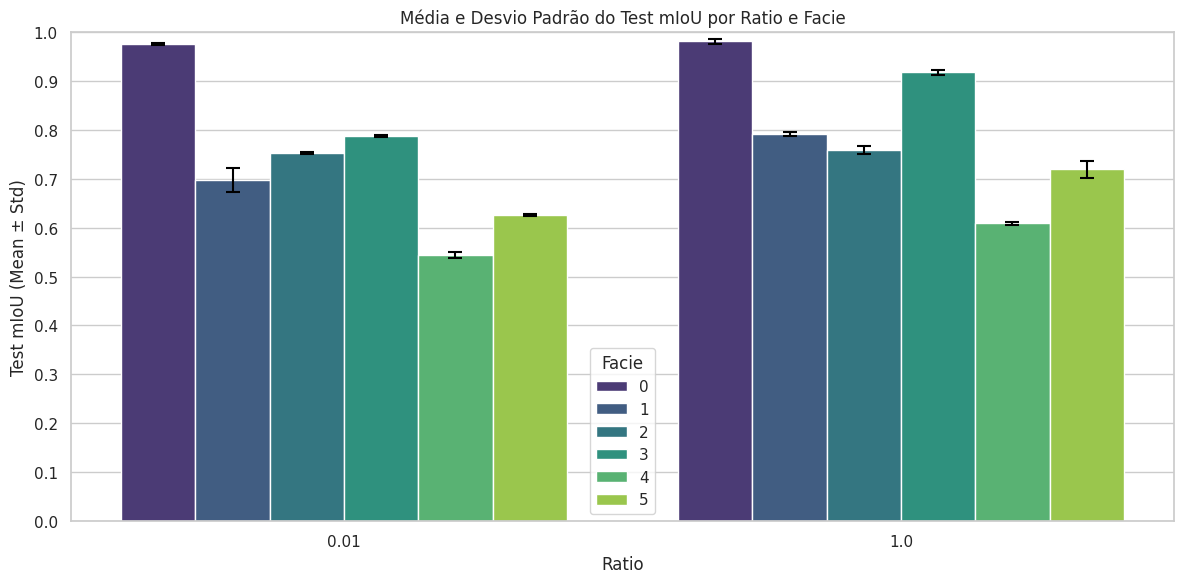

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Configurando o estilo
sns.set(style="whitegrid")

# Criando o gráfico
plt.figure(figsize=(12, 6))

# Plotando as médias com desvio padrão, agrupando por ratio
barplot = sns.barplot(
    data=grouped,
    x='ratio',  # Eixo X será o ratio
    y='test_mIoU_mean',  # Valores de média
    hue='facie',  # Diferencia pelas facies
    ci=None,  # Desativa o intervalo de confiança
    palette='viridis',  # Paleta de cores
    capsize=0.1,  # Tamanho das extremidades das barras de erro
    errwidth=1.5  # Largura das barras de erro
)

# Adicionando desvio padrão como linhas de erro
for i, bar in enumerate(barplot.patches):
    height = bar.get_height()  # Altura (média)
    error = grouped.iloc[i]['test_mIoU_std']  # Desvio padrão correspondente
    barplot.errorbar(
        x=bar.get_x() + bar.get_width() / 2,  # Posição no eixo X
        y=height,  # Valor no eixo Y (média)
        yerr=error,  # Desvio padrão
        fmt='none',  # Formato para não exibir marcador
        color='black',  # Cor da linha de erro
        capsize=5,  # Tamanho das extremidades das barras de erro
        elinewidth=1.5,  # Largura da linha de erro
        capthick=1.5  # Espessura das extremidades
    )

# Ajustando a escala do eixo Y de 0 a 1, de 0.1 em 0.1
plt.ylim(0, 1)  # Limita os valores do eixo Y
plt.yticks(np.arange(0, 1.1, 0.1))  # Define os ticks do eixo Y de 0 a 1 com intervalo de 0.1

# Personalização do gráfico
plt.title('Média e Desvio Padrão do Test mIoU por Ratio e Facie')
plt.xlabel('Ratio')
plt.ylabel('Test mIoU (Mean ± Std)')
plt.legend(title='Facie')

# Exibindo o gráfico
plt.tight_layout()
plt.show()